In [2]:
import matplotlib.pyplot as plt
import numpy as np

## logistic regression

Text(0, 0.5, 'Exam 2 score')

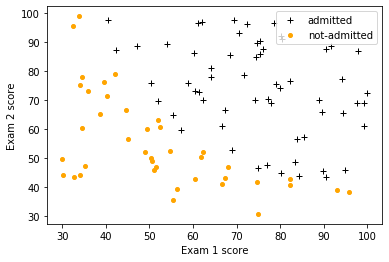

In [85]:
data = np.loadtxt('ex2data1.txt',delimiter=',')
X = data[:,:2]
y = data[:,2]
admitted= y==1
not_admitted= y==0
plt.plot(X[admitted,0],X[admitted,1],'k+',lw=1,label="admitted")
plt.plot(X[not_admitted,0],X[not_admitted,1],'ko',lw=0.5,ms=4,color="orange",label="not-admitted")
plt.legend(loc='upper right')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")

${h_{\theta}(x)=g(\theta^T X)}$

${g(z)=1/(1+e^{-z})}$

In [86]:
def sigmoid(z):
    #z can be 1d array or 2d matrix
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1+np.exp(-z))
    return g

In [87]:
def cost_function(theta, X, y):
    m = y.size

    # You need to return the following values correctly
    cost = 0
    grad = np.zeros(theta.shape)
    
    temp=sigmoid(X.dot(theta.T))
    cost = (1/m)*np.sum(-y.dot(np.log(temp))-(1-y).dot(np.log(1-temp)))
    grad = (1/m) * (temp-y).dot(X)
        
    return cost, grad

In [89]:
# cost function and gradient descent
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)
theta_zero = np.zeros(n+1)
cost,grad = cost_function(theta_zero,X,y)
print("{:.3f}".format(cost))
print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))

3
0.693
theta:
	[-2.516, -2.516, -2.516]


In [90]:
# learning parameters
import scipy.optimize as op
val = {'maxiter':400}
result = op.minimize(cost_function,theta_zero,(X,y),jac=True,method='TNC',options=val)
cost = result.fun
theta = result.x
print("get cost as {:.3f}".format(cost)+" and the expected value is 0.203")
print(theta)

get cost as 0.203 and the expected value is 0.203
[-25.1613187    0.20623159   0.20147149]


In [91]:
# predict an example
def predict(theta, X):
    m = X.shape[0]

    # Return the following variable correctly
    p = np.zeros(m)
    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [94]:
probability = sigmoid(np.dot([1,45,85],theta))
print(probability)
p =predict(theta,X)
print("the accuracy is {:.2f}%".format(np.mean(p==y)*100))

0.77629062453048
the accuracy is 89.00%


## regularized logistic regression

Text(0, 0.5, 'microchip 2 score')

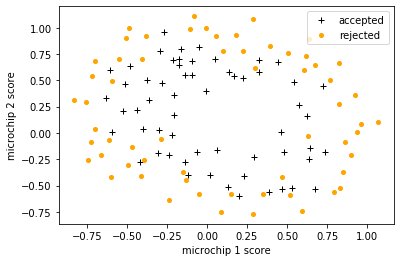

In [104]:
# regularized logistic regression
data = np.loadtxt('ex2data2.txt',delimiter=',')
X = data[:,:2]
y = data[:,2]
accepted = y==1
rejected = y==0
plt.plot(X[accepted,0],X[accepted,1],'k+',lw=1,label="accepted")
plt.plot(X[rejected,0],X[rejected,1],'ko',lw=0.5,ms=4,color="orange",label="rejected")
plt.legend(loc='upper right')
plt.xlabel("microchip 1 score")
plt.ylabel("microchip 2 score")

In [105]:
# using map feature to build a better classifier
# this is given
def map_feature(x1, x2):
    degree = 6

    x1 = x1.reshape((x1.size, 1))
    x2 = x2.reshape((x2.size, 1))
    result = np.ones(x1[:, 0].shape)

    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            result = np.c_[result, (x1**(i-j)) * (x2**j)]

    return result

In [108]:
X = map_feature(X[:, 0], X[:, 1])

In [115]:
def cost_function_reg(theta, X, y, lmd):
    m = y.size

    # You need to return the following values correctly
    cost = 0
    grad = np.zeros(theta.shape)
    t = theta
    t[0] = 0
    temp=sigmoid(X.dot(theta.T))
    cost = (1/m)*np.sum(-y.dot(np.log(temp))-(1-y).dot(np.log(1-temp)))+(lmd/m)*np.sum(np.square(t))
    grad = (1/m) * (temp-y).dot(X) + (lmd/m)*t
    return cost, grad

In [122]:
theta_zero=np.zeros(X.shape[1])
lmd = 1
cost,grad = cost_function_reg(theta_zero,X,y,lmd)
print("{:.3f}".format(cost))
print('grad:')
print('\t[{:.5f}, {:.5f}, {:.5f},{:.5f},{:.5f}]'.format(*grad[:5]))

0.693
grad:
	[0.00847, 0.00847, 0.01879,0.00847,0.01879]


In [136]:
val = {'maxiter':400}
result = op.minimize(cost_function_reg,theta_zero,(X,y,lmd),method='TNC',jac=True,options=val)
cost = result.fun
theta = result.x
print("get cost as {:.3f}".format(cost))
print(theta[:5])

get cost as 0.620
[0.         0.1218427  0.03990435 0.1218427  0.03990435]
